In [ ]:
#Map the power plants owned by the top 5 most common energy companies as red. 
#Map the rest of the plants as dark grey.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
df = pd.read_csv("powerplants.csv")
df.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486


In [3]:
df['Utility_Na'].value_counts().head(5)

Pacific Gas & Electric Co        82
Erie Boulevard Hydropower LP     71
Sustainable Power Group, LLC     63
Southern California Edison Co    62
PacifiCorp                       59
Name: Utility_Na, dtype: int64

In [5]:
top_five_list = ['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp']

In [6]:
df_top5 = df.loc[df['Utility_Na'].isin(top_five_list)]

In [7]:
df3 = df.loc[-df['Utility_Na'].isin(top_five_list)]

In [9]:
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


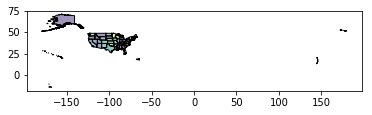

In [10]:
states.plot()

In [11]:
points_top = df_top5.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points_top

58                       POINT (-119.2567 37.147926)
93                       POINT (-121.86215 40.45193)
109                     POINT (-120.80355 39.215979)
111                    POINT (-119.087712 36.909137)
112                    POINT (-119.087556 36.908907)
113                    POINT (-121.249438 40.007445)
114                     POINT (-121.327692 39.91062)
115                    POINT (-121.190663 40.175656)
116                    POINT (-121.148241 40.085476)
117                    POINT (-121.149373 40.085997)
118                    POINT (-121.657383 39.788877)
119                    POINT (-120.813239 38.771764)
120                    POINT (-122.121904 40.404645)
121                     POINT (-122.02093 40.570817)
122                    POINT (-121.409687 39.825907)
123            POINT (-121.631819 39.86926500000001)
124                       POINT (-120.8443 39.29807)
125                    POINT (-120.767437 39.256873)
126                    POINT (-120.767046 39.2

In [12]:
points_rest = df3.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
points_rest

0               POINT (-87.35682299999999 33.458665)
1                           POINT (-88.0103 31.0069)
2                       POINT (-86.283056 32.583889)
3                           POINT (-85.9708 34.0128)
4               POINT (-87.19648599999999 33.644344)
5                           POINT (-106.375 31.7569)
6                           POINT (-87.7811 32.6017)
7                 POINT (-86.05240000000001 33.7845)
8                           POINT (-87.4495 33.2553)
9                           POINT (-86.2548 32.6189)
10                      POINT (-86.337547 33.425878)
11                          POINT (-86.5187 32.9633)
12              POINT (-85.91144200000001 32.680394)
13              POINT (-86.44489200000001 32.806025)
14                POINT (-87.10769999999999 33.9406)
15                      POINT (-85.887614 32.535436)
16              POINT (-85.75380600000001 34.172142)
17                          POINT (-85.8901 32.5743)
18                      POINT (-86.458056 33.2

In [13]:
plants_top = gpd.GeoDataFrame(df_top5, geometry=points_top)
plants_top.crs = {'init' : 'epsg:4326'}

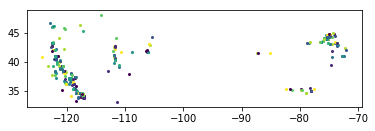

In [14]:
plants_top.plot()

In [15]:
rest_of_plants = gpd.GeoDataFrame(df3, geometry=points_rest)
rest_of_plants.crs = {'init' : 'epsg:4326'}
rest_of_plants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)


(-197.09527795, 197.72483894999999, -18.84439205, 75.660855049999995)

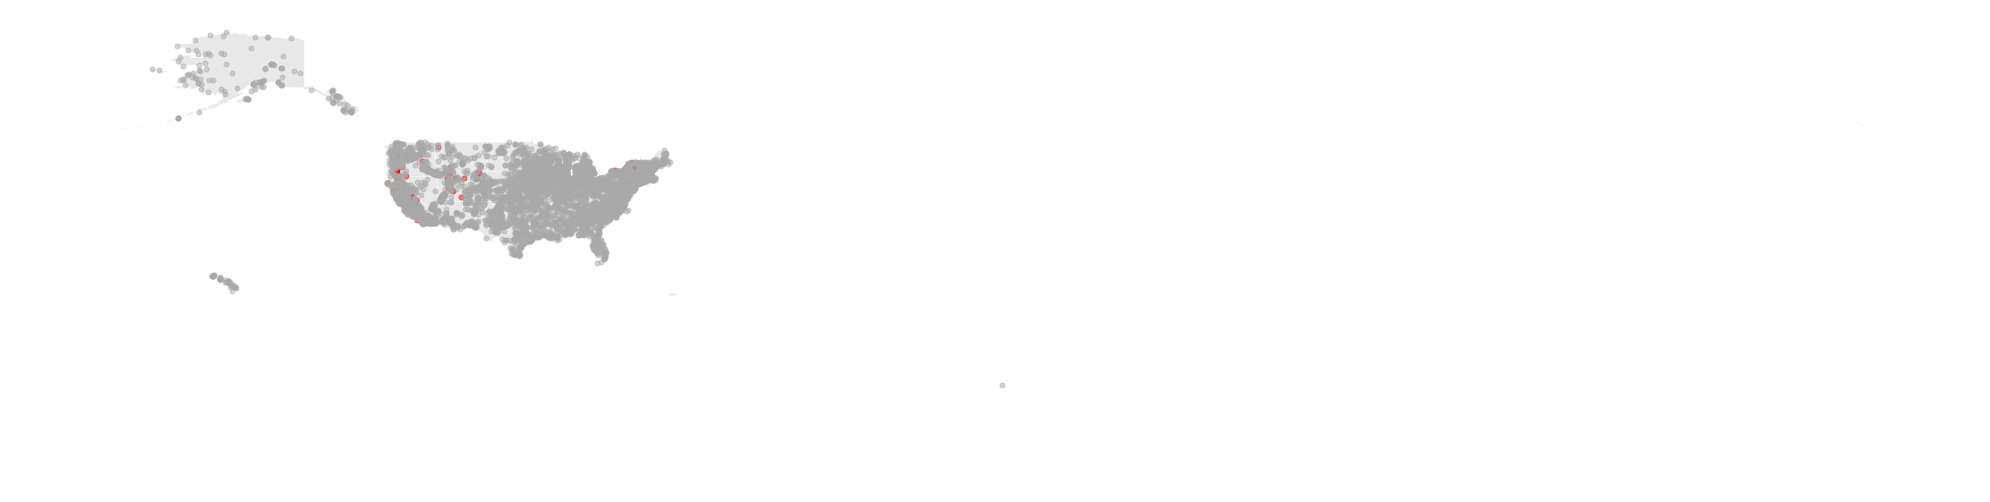

In [16]:
ax = states.plot(figsize=(35,20), linewidth=0.25, edgecolor='white', color='lightgrey') 
plants_top.plot(linewidth=0, markersize=5, alpha=0.5, color='red', ax=ax)
rest_of_plants.plot(linewidth=0, markersize=5, alpha=0.5, color='darkgrey', ax=ax)
ax.axis('off')